Saving Salary Data.csv to Salary Data.csv
✅ File uploaded: Salary Data.csv
🔎 Dataset Loaded Successfully
Shape: (375, 6)


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0



📌 DATA INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB
None

📌 DESCRIPTIVE STATISTICS


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,373.0,NaN,NaN,NaN,37.431635,7.069073,23.0,31.0,36.0,44.0,53.0
Gender,373,2,Male,194,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education Level,373,3,Bachelor's,224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job Title,373,174,Director of Marketing,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Years of Experience,373.0,NaN,NaN,NaN,10.030831,6.557007,0.0,4.0,9.0,15.0,25.0
Salary,373.0,NaN,NaN,NaN,100577.345845,48240.013482,350.0,55000.0,95000.0,140000.0,250000.0



📌 MISSING VALUES
Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

📌 DUPLICATE ROWS: 50


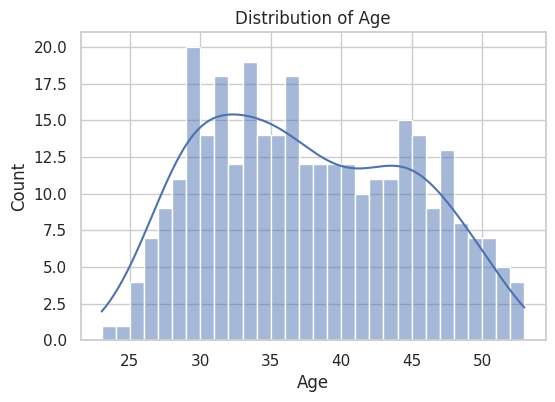

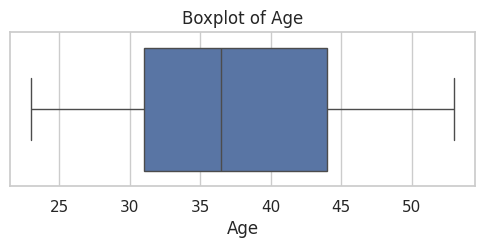

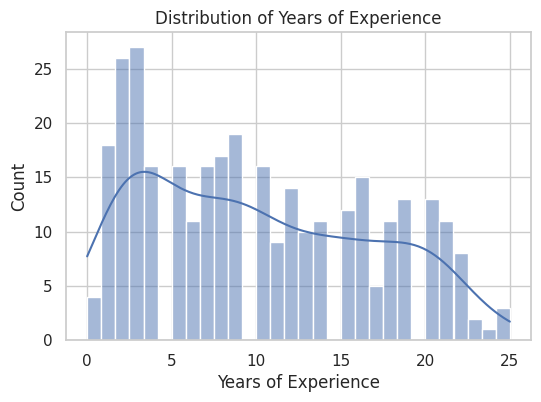

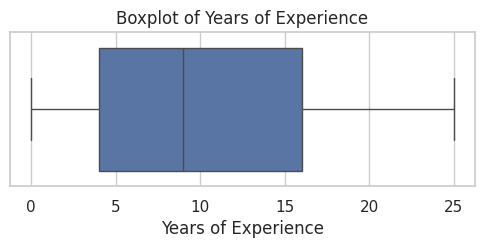

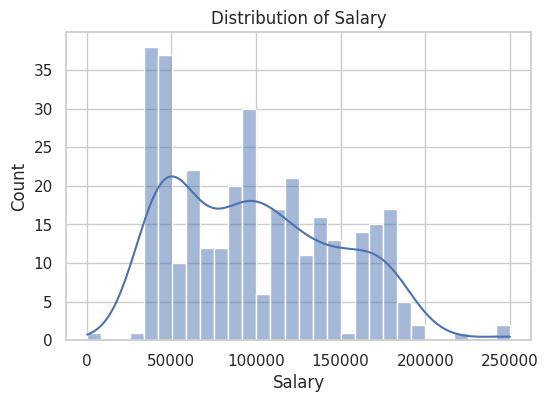

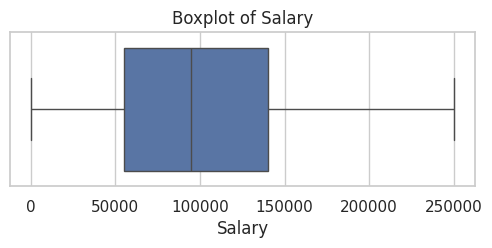

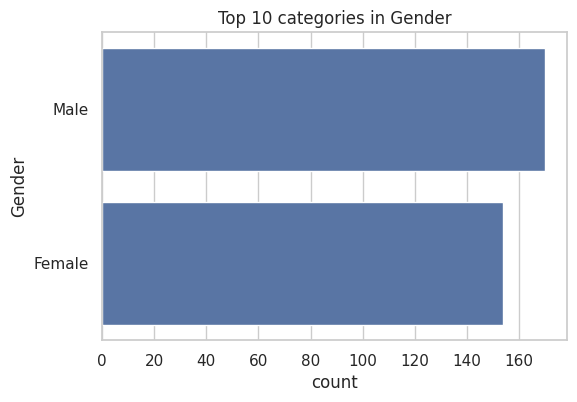

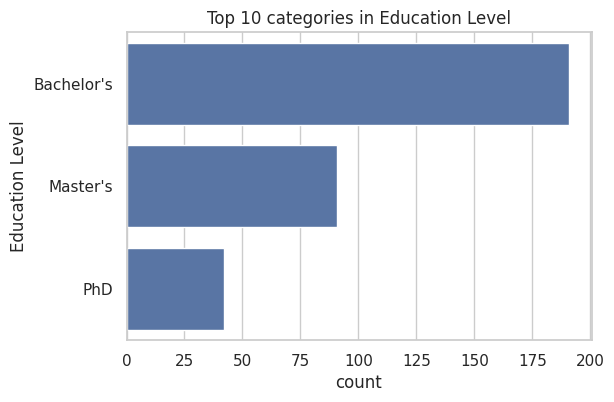

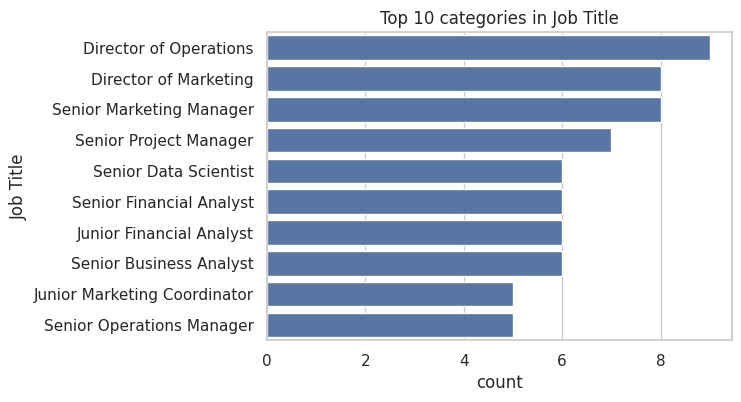

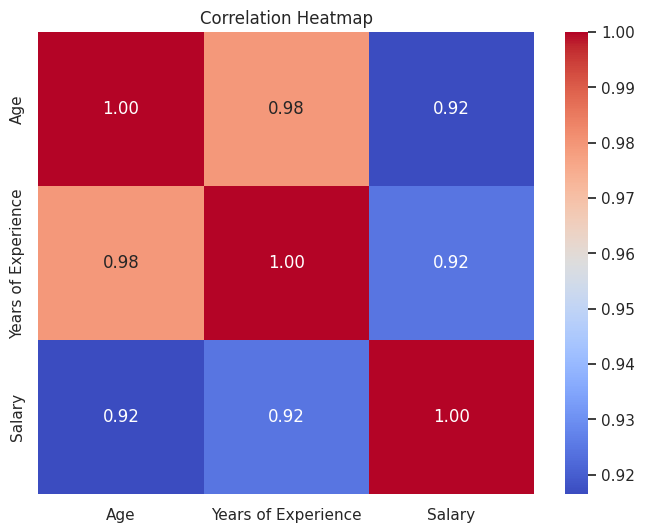


✅ Cleaned dataset saved as 'cleaned_dataset.csv'


In [1]:
# ===========================
# 📊 EXPLORATORY DATA ANALYSIS (EDA)
# ===========================

# STEP 1: IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp, ttest_ind, chi2_contingency
from IPython.display import display
import io

sns.set(style="whitegrid")

# STEP 2: UPLOAD DATASET (COLAB FRIENDLY)
try:
    from google.colab import files
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]
    print(f"✅ File uploaded: {file_name}")
    if file_name.endswith('.csv'):
        df = pd.read_csv(io.BytesIO(uploaded[file_name]))
    elif file_name.endswith(('.xlsx', '.xls')):
        df = pd.read_excel(io.BytesIO(uploaded[file_name]))
    else:
        raise ValueError("❌ Unsupported file format. Please upload CSV or Excel.")
except ImportError:
    # If running locally, just set path manually
    file_name = "your_dataset.csv"
    df = pd.read_csv(file_name)

print("🔎 Dataset Loaded Successfully")
print("Shape:", df.shape)
display(df.head())

# STEP 3: DATA OVERVIEW
print("\n📌 DATA INFO")
print(df.info())

print("\n📌 DESCRIPTIVE STATISTICS")
display(df.describe(include='all').T)

# STEP 4: MISSING VALUES & DUPLICATES
print("\n📌 MISSING VALUES")
print(df.isnull().sum())

print("\n📌 DUPLICATE ROWS:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

# STEP 5: UNIVARIATE ANALYSIS
numeric_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include=['object','category']).columns

# Numeric columns - Histograms & Boxplots
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[col].dropna())
    plt.title(f"Boxplot of {col}")
    plt.show()

# Categorical columns - Countplots
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index[:10])
    plt.title(f"Top 10 categories in {col}")
    plt.show()

# STEP 6: CORRELATION ANALYSIS
if len(numeric_cols) > 1:
    plt.figure(figsize=(8,6))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()

# STEP 7: SIMPLE HYPOTHESIS TEST (OPTIONAL)
if "price" in df.columns:
    sample = df["price"].dropna()
    if len(sample) > 5:
        t_stat, p_val = ttest_1samp(sample, 30)
        print("\n📊 Hypothesis Test: Is mean price = 30?")
        print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")
        if p_val < 0.05:
            print("✅ Statistically significant difference from 30")
        else:
            print("ℹ️ No significant difference from 30")

# STEP 8: SAVE CLEANED DATA
df.to_csv("cleaned_dataset.csv", index=False)
print("\n✅ Cleaned dataset saved as 'cleaned_dataset.csv'")
